# note;
the data given has several variables namely heartrate(hr), average blood pressure(avg_bp), amplitude of the pulse(amp) and other variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("C:\Ruthvik\Academics\SOP\CSV files\data_blood_modified.csv")
df.head()

,hr,avg_bp,amp,d,f,b,s,rho,mu,wss,qf
0,70.0,12352.5,5465.3,0.010158,0.01,-0.05,0.010,1055.0,0.00552,2.340000e-08,-0.000003
1,72.0,12352.5,5465.3,0.010158,0.01,-0.05,0.010,1055.0,0.00552,2.220000e-08,-0.000003
2,73.0,12352.5,5465.3,0.010158,0.01,-0.05,0.010,1055.0,0.00552,2.170000e-08,-0.000003
3,70.0,12352.5,5465.3,0.010158,0.01,-0.05,0.001,1055.0,0.00552,2.320000e-08,-0.000003
4,72.0,12352.5,5465.3,0.010158,0.01,-0.05,0.001,1055.0,0.00552,2.210000e-08,-0.000003


entries in avg_bp seems to be the same, but the given data set is too large and there are different entries for avg_bp itself going futher into the set

In [3]:
df1=df[['hr','avg_bp','amp','rho','mu','wss','qf']]
df1.head()

,hr,avg_bp,amp,rho,mu,wss,qf
0,70.0,12352.5,5465.3,1055.0,0.00552,2.340000e-08,-0.000003
1,72.0,12352.5,5465.3,1055.0,0.00552,2.220000e-08,-0.000003
2,73.0,12352.5,5465.3,1055.0,0.00552,2.170000e-08,-0.000003
3,70.0,12352.5,5465.3,1055.0,0.00552,2.320000e-08,-0.000003
4,72.0,12352.5,5465.3,1055.0,0.00552,2.210000e-08,-0.000003


In [4]:
type(df.iloc[1]['wss'])

numpy.float64

In [5]:
df1 = df1.iloc[0:43740]

In [6]:
df1

,hr,avg_bp,amp,rho,mu,wss,qf
0,70.0,12352.5,5465.3,1055.0,0.00552,2.340000e-08,-0.000003
1,72.0,12352.5,5465.3,1055.0,0.00552,2.220000e-08,-0.000003
2,73.0,12352.5,5465.3,1055.0,0.00552,2.170000e-08,-0.000003
3,70.0,12352.5,5465.3,1055.0,0.00552,2.320000e-08,-0.000003
4,72.0,12352.5,5465.3,1055.0,0.00552,2.210000e-08,-0.000003
...,...,...,...,...,...,...,...
43735,72.0,13818.8,6265.1,1061.2,0.00686,2.741220e+00,-0.210993
43736,73.0,13818.8,6265.1,1061.2,0.00686,2.666640e+00,-0.205252
43737,70.0,13818.8,6265.1,1061.2,0.00686,2.034210e+00,-0.109831
43738,72.0,13818.8,6265.1,1061.2,0.00686,1.922770e+00,-0.103814


# Linear Regression

In [7]:
#Application of univariate linear regression

In [8]:
df2=df1[['hr','wss']]
df2.head()

,hr,wss
0,70.0,2.340000e-08
1,72.0,2.220000e-08
2,73.0,2.170000e-08
3,70.0,2.320000e-08
4,72.0,2.210000e-08


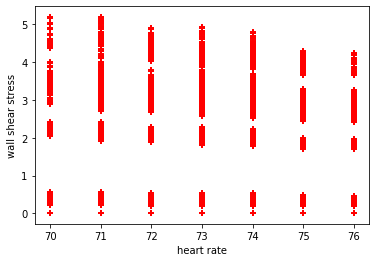

In [9]:
%matplotlib inline 
plt.xlabel('heart rate')
plt.ylabel('wall shear stress')
plt.scatter(df2.hr,df2.wss,color = 'red',marker = '+')

In [10]:
reg = linear_model.LinearRegression()
reg.fit(df2[['hr']],df2.wss)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#predictign wss based on given heart rate
reg.predict([[72]])

array([0.59601363])

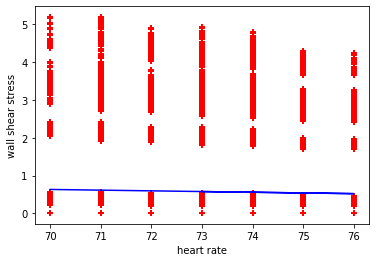

In [12]:
%matplotlib inline 
plt.xlabel('heart rate')
plt.ylabel('wall shear stress')
plt.scatter(df2.hr,df2.wss,color = 'red',marker = '+')
plt.plot(df2.hr,reg.predict(df2[['hr']]),color = 'blue')

In [13]:
#application of multivariate linear regression

In [14]:
reg = linear_model.LinearRegression()
reg.fit(df1[['hr','avg_bp','amp']],df1.wss)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
reg.predict([[74,12400,6000]])

array([0.61799824])

# Logistic Regression

In [16]:
df3=df1[['avg_bp','wss']]
df3.head()

,avg_bp,wss
0,12352.5,2.340000e-08
1,12352.5,2.220000e-08
2,12352.5,2.170000e-08
3,12352.5,2.320000e-08
4,12352.5,2.210000e-08


In [17]:
x = df3['wss'].median()
x

4.495e-07

In [18]:
df3['wss'].loc[(df3['wss']>x)] = 1
df3['wss'].loc[(df3['wss']<x)] = 0

C:\Users\ruthv\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ruthv\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
df3

,avg_bp,wss
0,12352.5,0.0
1,12352.5,0.0
2,12352.5,0.0
3,12352.5,0.0
4,12352.5,0.0
...,...,...
43735,13818.8,1.0
43736,13818.8,1.0
43737,13818.8,1.0
43738,13818.8,1.0


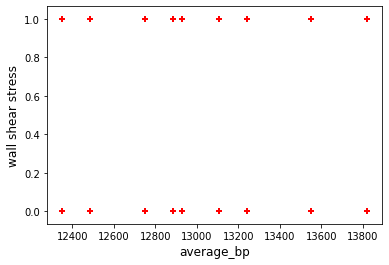

In [20]:
%matplotlib inline
plt.xlabel('average_bp',size = '12')
plt.ylabel('wall shear stress',size = '12')
plt.scatter(df3.avg_bp,df3.wss,color = 'red', marker = '+')

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df3[['avg_bp']],df3.wss,test_size = 0.1)

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(df3[['avg_bp']],df3.wss)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
model.predict(x_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [24]:
model.predict_proba(x_test)

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       ...,
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]])

In [25]:
model.score(x_test,y_test)

0.5130315500685871

# Clustering - k-means

In [26]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [27]:
df4=df1[['avg_bp','wss']]
df4.head()

,avg_bp,wss
0,12352.5,2.340000e-08
1,12352.5,2.220000e-08
2,12352.5,2.170000e-08
3,12352.5,2.320000e-08
4,12352.5,2.210000e-08


Text(0, 0.5, 'wall shear stress')

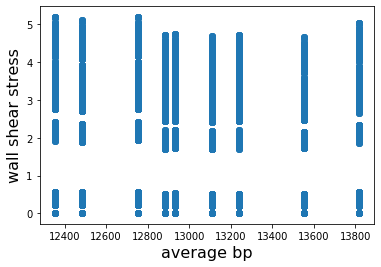

In [33]:
plt.scatter(df4.avg_bp,df4['wss'])
plt.xlabel('average bp',size=16)
plt.ylabel('wall shear stress',size=16)

In [34]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df4[['avg_bp','wss']])
y_predicted

array([2, 2, 2, ..., 0, 0, 0])

In [36]:
df4['cluster']=y_predicted
df4.head()

C:\Users\ruthv\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,avg_bp,wss,cluster
0,12352.5,2.340000e-08,2
1,12352.5,2.220000e-08,2
2,12352.5,2.170000e-08,2
3,12352.5,2.320000e-08,2
4,12352.5,2.210000e-08,2


In [37]:
km.cluster_centers_

array([[1.36855000e+04, 5.75245155e-01],
       [1.29834200e+04, 5.67677178e-01],
       [1.24191500e+04, 6.10615433e-01]])

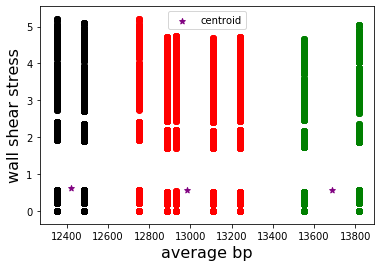

In [39]:
df5 = df4[df4.cluster==0]
df6 = df4[df4.cluster==1]
df7 = df4[df4.cluster==2]
plt.scatter(df5.avg_bp,df5['wss'],color='green')
plt.scatter(df6.avg_bp,df6['wss'],color='red')
plt.scatter(df7.avg_bp,df7['wss'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('average bp',size=16)
plt.ylabel('wall shear stress',size=16)
plt.legend()

Elbow plot

In [40]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df4[['avg_bp','wss']])
    sse.append(km.inertia_)

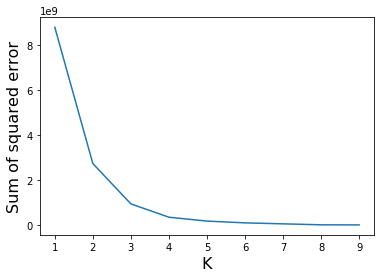

In [41]:
plt.xlabel('K',size=16)
plt.ylabel('Sum of squared error',size=16)
plt.plot(k_rng,sse)